In [67]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import time

#打開瀏覽器
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://www.cupoy.com/newsfeed/topstory")

categories = {}  #存取各分類的新聞數
news_hot = []    #存取新聞標題
n = 0            #計算已存的新聞數
flag = 0         #為1時即存好500篇新聞

while n <= 500 :
    
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'lxml')
    
    for d in soup.find_all('div', class_="sc-eEieub sc-iuDHTM ibJqYc" ):
        category = d.find(class_="sc-gacfCG bPSpUf").text
        news = d.find(class_="sc-erNlkL sc-ekulBa hDLssh").text
        
        #存取新聞
        if news not in news_hot :    
            news_hot.append(news)  
            n+=1            

            #存取類別
            if category not in categories :
                categories[category] = 1
            else :
                categories[category] += 1
        
        #存好500篇跳出迴圈
        if n == 500 :
            flag = 1
            break
    
    if flag == 1:
        flag = 0
        break
    
    #暫停一秒
    time.sleep(1) 
    
    #網頁下滑
    browser.execute_script("window.scrollTo(0, 1000000);")
print(categories)
browser.quit()

{'理財': 15, '商業': 8, '財經': 14, '職場白領': 2, 'iThome 新聞': 7, '無人駕駛': 3, 'AI與大數據': 6, 'Inside': 4, '資訊安全': 5, 'Google專區': 4, '職涯': 14, '科技': 20, '汽車': 12, 'Engadget': 3, 'BuzzOrange 報橘': 3, 'The News Lens 關鍵評論網': 22, '電影': 6, '遊戲情報': 29, 'PanSci 科學新聞網': 2, '醫療健康': 27, '電子商務': 4, '趨勢與策略': 5, '旅遊': 9, '知識家': 3, '風傳媒 風生活': 13, '房地產': 3, '國際': 6, '網紅經濟與自媒體': 2, 'SmartM': 1, '育兒': 35, '兩岸': 3, '大人學-財務知識': 1, 'TechOrange 科技報橘': 1, 'Qooah': 2, '科學最前線': 8, '相機': 2, '3C產品': 7, '影劇': 3, '蘋果專區': 2, '手機平板': 3, 'APP應用程式': 4, '流動日報': 2, '區塊鏈技術': 7, '美妝保養': 10, '美食': 9, '生活報橘-VidaOrange': 3, 'MY-HiEND': 1, '產品設計': 1, '享樂女性': 19, 'Yahoo奇摩理財': 7, 'UNWIRE.HK 流動科技生活': 4, '女人迷 womany': 6, '寵物': 2, '今周刊': 7, '健身': 1, '創業小聚': 1, 'Soft & Share 軟體開發資訊分享': 2, '生活空間': 9, '親子家庭': 2, '兩性': 4, 'Knowing': 3, '城市食旅': 5, '天下文化': 2, '創業': 1, '上報UpMedia': 18, '紐約時報': 3, '獨立評論在天下': 1, '上班族的茶水間': 1, '癮科技': 6, 'Girl Secret': 1, 'MF這樣變型男': 1, '攝影': 1, '棒球': 5, '地球圖輯隊': 1, '籃球': 2, '轉角國際 udn Global': 1, '蘋果仁': 1, '好文共賞': 3, '電腦玩

In [84]:
print(news_hot)

['【下班經濟學】菜市場選股法！竟存到獲利100%的致富股？ 月光族老師一招變身5000萬富媽媽-風傳媒', '武漢肺炎風暴》義大利、南韓、伊朗相繼淪為重災區\u3000專家：疫情逼近「全球大流行」關鍵時刻！-風傳媒', '疫情再嚴重美股一樣照漲？錯，這2個景氣指標爆空頭訊號：黑天鵝近在眼前！-風傳媒', 'Excel內建圖表，就能畫「甘特圖」！簡單 4 步驟，讓專案排程一目瞭然 | 經理人', 'Netgear推出兩款PoE++交換器，網路埠可提供60瓦電力 | iThome', '測溫儀真假±0.5℃:大疆用棉花棒搞掂？脫離環境談精度就是耍流氓 | 機器之心', '智能質檢升級換代：爲什麼“關鍵詞”不夠用了？ | 機器之心', 'Google釋出可簡單為模型加入公平性限制的函式庫TFCO | iThome', '小賈斯丁也遭殃！美國 MGM 飯店爆大規模資料外洩 - INSIDE', 'Check Point：Haken惡意程式成功進駐Google Play上的8款Android程式 | iThome', '麥肯錫研究：2030年時中低頻段5G將觸及80%人口，高頻段覆蓋率只有25% | iThome', 'Google警告華為用戶勿側載Gmail、YouTube等App | iThome', 'Alphabet、軟銀、電信業者共組HAPS聯盟以推動高空通訊 | iThome', '程式語言Nim社羣2019大調查：函式庫少影響使用意願 | iThome', '美國對外投資審查法案最終版：嚴控AI關鍵技術、敏感個人數據投資 | 機器之心', '臺灣大哥大力搏 5G，跟南韓 SK 電訊簽合作備忘錄 - INSIDE', 'Safari 9月起將拒絕效期太長的新網站SSL憑證 | iThome', 'Canalys：受武漢肺炎衝擊，2020年全球PC出貨可能重跌近8.5% | iThome', 'IE記憶體毀損漏洞傳有攻擊發生，迫使微軟對Windows 7發出例外修補 | iThome', '研究：7家BLE系統單晶片的SDK含有眾多安全漏洞 | iThome', '歐盟警方提議建立泛歐人臉辨識資料庫 | iThome', '鴻海深圳鄭州廠激勵復工！特定獎金升逾 3 萬元 - INSIDE', '百度主辦國際頂會CVPR 2020 LID研討會，聚焦弱監督學習領域前

In [68]:
print(len(news_hot))

500


In [69]:
print(categories.keys())

dict_keys(['理財', '商業', '財經', '職場白領', 'iThome 新聞', '無人駕駛', 'AI與大數據', 'Inside', '資訊安全', 'Google專區', '職涯', '科技', '汽車', 'Engadget', 'BuzzOrange 報橘', 'The News Lens 關鍵評論網', '電影', '遊戲情報', 'PanSci 科學新聞網', '醫療健康', '電子商務', '趨勢與策略', '旅遊', '知識家', '風傳媒 風生活', '房地產', '國際', '網紅經濟與自媒體', 'SmartM', '育兒', '兩岸', '大人學-財務知識', 'TechOrange 科技報橘', 'Qooah', '科學最前線', '相機', '3C產品', '影劇', '蘋果專區', '手機平板', 'APP應用程式', '流動日報', '區塊鏈技術', '美妝保養', '美食', '生活報橘-VidaOrange', 'MY-HiEND', '產品設計', '享樂女性', 'Yahoo奇摩理財', 'UNWIRE.HK 流動科技生活', '女人迷 womany', '寵物', '今周刊', '健身', '創業小聚', 'Soft & Share 軟體開發資訊分享', '生活空間', '親子家庭', '兩性', 'Knowing', '城市食旅', '天下文化', '創業', '上報UpMedia', '紐約時報', '獨立評論在天下', '上班族的茶水間', '癮科技', 'Girl Secret', 'MF這樣變型男', '攝影', '棒球', '地球圖輯隊', '籃球', '轉角國際 udn Global', '蘋果仁', '好文共賞', '電腦玩物', 'VOGUE', '運動', 'Mobile01', '足球', "Goston's Blog", '點子生活', '商業周刊', 'Heaven Raven', '平面設計'])


In [70]:
import pandas as pd
data1 = pd.DataFrame(news_hot,columns = ["文章標題"])
data2 = pd.Series(categories)
print(data1)
print(data2)

                                                  文章標題
0    【下班經濟學】菜市場選股法！竟存到獲利100%的致富股？ 月光族老師一招變身5000萬富媽媽...
1      武漢肺炎風暴》義大利、南韓、伊朗相繼淪為重災區　專家：疫情逼近「全球大流行」關鍵時刻！-風傳媒
2              疫情再嚴重美股一樣照漲？錯，這2個景氣指標爆空頭訊號：黑天鵝近在眼前！-風傳媒
3           Excel內建圖表，就能畫「甘特圖」！簡單 4 步驟，讓專案排程一目瞭然 | 經理人
4             Netgear推出兩款PoE++交換器，網路埠可提供60瓦電力 | iThome
5              測溫儀真假±0.5℃:大疆用棉花棒搞掂？脫離環境談精度就是耍流氓 | 機器之心
6                        智能質檢升級換代：爲什麼“關鍵詞”不夠用了？ | 機器之心
7               Google釋出可簡單為模型加入公平性限制的函式庫TFCO | iThome
8                   小賈斯丁也遭殃！美國 MGM 飯店爆大規模資料外洩 - INSIDE
9    Check Point：Haken惡意程式成功進駐Google Play上的8款Androi...
10     麥肯錫研究：2030年時中低頻段5G將觸及80%人口，高頻段覆蓋率只有25% | iThome
11           Google警告華為用戶勿側載Gmail、YouTube等App | iThome
12            Alphabet、軟銀、電信業者共組HAPS聯盟以推動高空通訊 | iThome
13                程式語言Nim社羣2019大調查：函式庫少影響使用意願 | iThome
14              美國對外投資審查法案最終版：嚴控AI關鍵技術、敏感個人數據投資 | 機器之心
15                 臺灣大哥大力搏 5G，跟南韓 SK 電訊簽合作備忘錄 - INSIDE
16                 Safari 9月起將拒絕效期太長的新網站SSL憑證 | iThome
17       C

In [71]:
#取前10名
n = 10
categories = sorted(categories.items(),key=lambda item:item[1],reverse=True)
 
categories_hot = categories[:n]
 
print(categories_hot)
 
categories_hot_dic = {}
for ca in categories_hot:
    categories_hot_dic[ca[0]] = ca[1]
print(categories_hot_dic)


[('育兒', 35), ('遊戲情報', 29), ('醫療健康', 27), ('The News Lens 關鍵評論網', 22), ('科技', 20), ('享樂女性', 19), ('上報UpMedia', 18), ('理財', 15), ('財經', 14), ('職涯', 14)]
{'育兒': 35, '遊戲情報': 29, '醫療健康': 27, 'The News Lens 關鍵評論網': 22, '科技': 20, '享樂女性': 19, '上報UpMedia': 18, '理財': 15, '財經': 14, '職涯': 14}


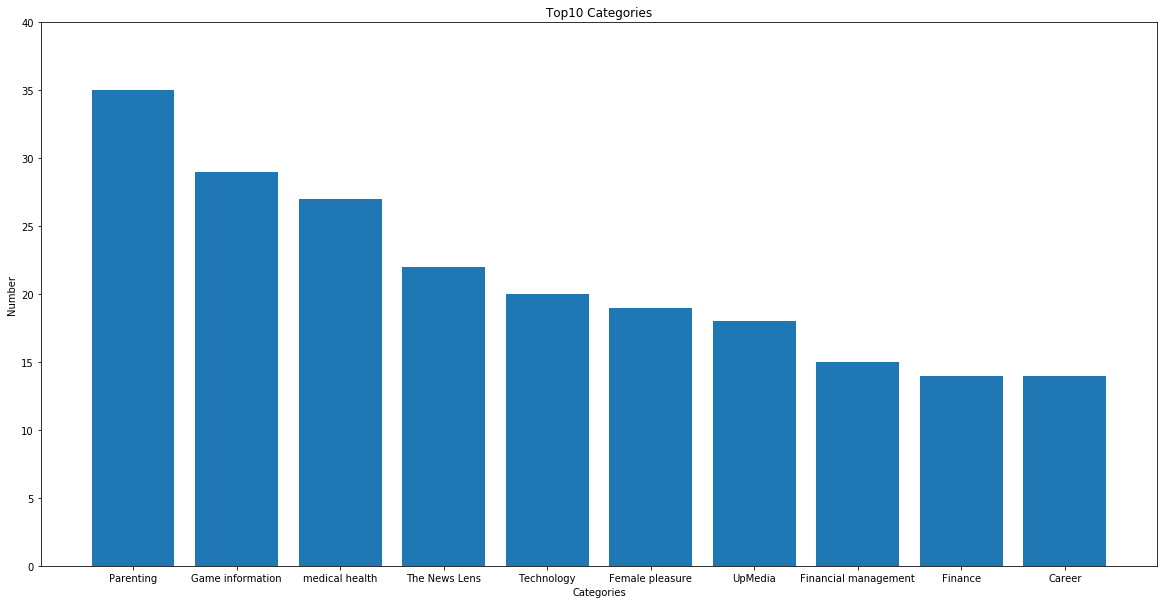

In [73]:
import matplotlib.pyplot as plt
 
plt.figure(figsize = (20,10))
listx = ['Parenting','Game information','medical health','The News Lens','Technology','Female pleasure','UpMedia',
         'Financial management','Finance','Career']
listy = [35,29,27,22,20,19,18,15,14,14]

plt.bar(listx,listy)
plt.ylim(0,40)
plt.title("Top10 Categories")
plt.xlabel ("Categories")
plt.ylabel("Number")
plt.show()

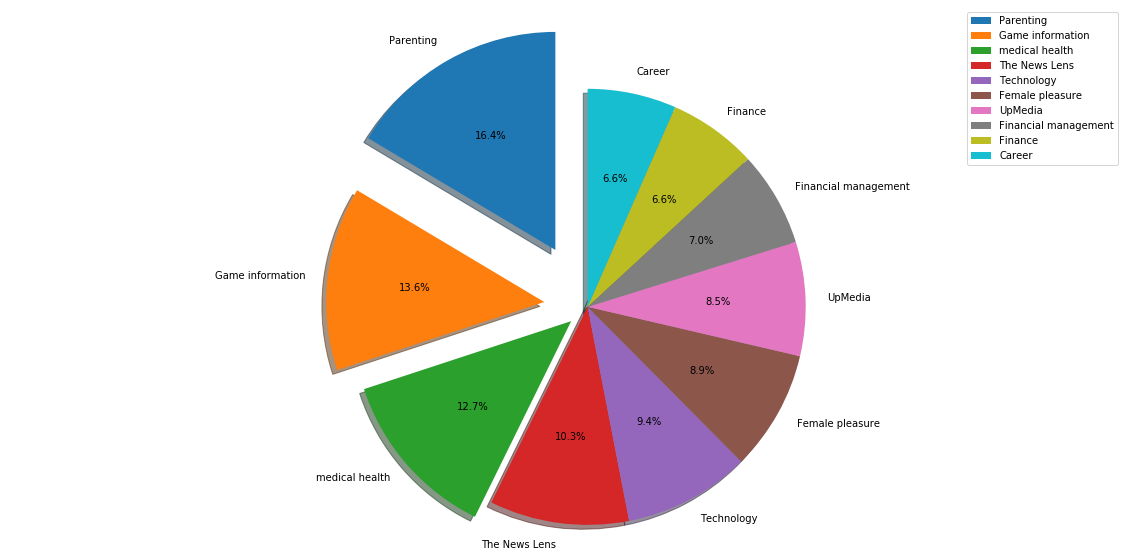

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
listx = ['Parenting','Game information','medical health','The News Lens','Technology','Female pleasure','UpMedia',
         'Financial management','Finance','Career'] #類別
listy = [35,29,27,22,20,19,18,15,14,14] #數量
#colors = ["red",""]
explode = (0.3,0.2,0.1,0,0,0,0,0,0,0) #>0 則突出
plt.pie (listy, explode = explode , labels = listx  , \
        labeldistance = 1.1, autopct = "%3.1f%%" , shadow = True, startangle = 90 , pctdistance = 0.6)

plt.axis("equal")
plt.legend()
plt.show()

In [170]:
import jieba
import jieba.analyse
from collections import Counter
#导入自定义词典
jieba.load_userdict("dict.txt")

texts = ""
for text in news_hot:
#获取关键词
    texts = texts+ "," + text

word_number = {}
seg_list = jieba.cut(texts)
c = Counter()
for x in seg_list:
    if len(x)>1 and x != '\r\n':
        c[x] += 1

for (k,v) in c.most_common(300):
    word_number[k] = v
    


tags = jieba.analyse.extract_tags(texts, topK=150)
print ("關鍵詞:")
print ("/".join(tags))

關鍵詞:
20/風傳媒/遊戲/媽媽/武漢/關鍵/新聞/網站/News/Lens/評論網/專屬/旅遊/肺炎/媽媽經/10/什麼/gamebase/體育/客邦/iThome/科技/日報/--/即時/防疫/理財/資訊/上報/妞新聞/niusnews/疫情/基地/新報/Xperia/Yahoo/奇摩/賽程/戰績/FOX/Mobile01/新冠/New/MobileLife/流動/ETtoday/比分/TechNews/Sony/生活/Google/5G/設計/中國/II/公開/Magazine/Cool3c/信傳媒/草莓/最新/機器/手機/數位/一個/VidaOrange/Day/今週刊/雜誌/早安/推出/健康/南韓/網路/美國/30/時代/決定/財富網/顛覆/改變/unwire/hk/Womany/時報/Taiwan/MOOK/景點家/墨刻/華文/世界/香港/病毒/品牌/大利/康健/打造/口罩/商周/如何/魔法/風暴/專家/簡單/影響/開發/人類/這個/還有/BuzzOrange/成為/Apple/電影/怎麼/這樣/蘇打/開放/29/確診/還是/登場/優惠/充電/免費/228/.../區塊/線上/發表/紐約/發售/Vogue/中文/女人/感染/病例/英文/全新/比特/北市/酒精/人生/專案/INSIDE/Android/用戶/19/投資/技術/發生


In [181]:
import jieba
 
#去除停用词
stopwords2 = []
with open ("stopWords.txt","r",encoding = 'utf-8') as sf:
    stopwords = sf.readlines()
    
for stopword in stopwords :
    stopwords2.append(stopword.strip())
    
for tag in tags :
    if tag in stopwords2 :
        tags.remove(tag)
        
mydict2 = []
with open ("dict.txt","r",encoding = 'utf-8') as df:
    mydict = df.readlines()
    
for dicts in mydict :
    mydict2.append(dicts.strip())

for tag in tags :
    if tag in mydict2 :
        tags.remove(tag)
            
word_num_dic = {}
for tag in tags :
    word_num_dic[tag] = word_number[tag]
print(word_num_dic)

{'武漢': 31, '旅遊': 25, '肺炎': 33, 'gamebase': 22, '體育': 22, '防疫': 15, '疫情': 17, 'Xperia': 11, '賽程': 11, '戰績': 11, 'FOX': 11, '新冠': 10, '比分': 11, 'Sony': 9, '生活': 23, 'Google': 8, '5G': 8, '設計': 8, '中國': 8, 'II': 8, '公開': 8, 'Cool3c': 8, '草莓': 9, '手機': 7, '數位': 7, '南韓': 6, '網路': 6, '美國': 6, '時代': 6, '顛覆': 6, '改變': 6, 'hk': 6, 'Womany': 6, '時報': 6, 'Taiwan': 6, 'MOOK': 6, '世界': 16, '香港': 12, '病毒': 9, '品牌': 11, '口罩': 7, '魔法': 6, '風暴': 5, '專家': 5, '簡單': 5, '影響': 5, '開發': 5, '人類': 5, 'Apple': 5, '電影': 5, '蘇打': 5, '開放': 5, '確診': 5, '登場': 5, '優惠': 5, '充電': 5, '免費': 5, '228': 5, '區塊': 5, '線上': 5, '發表': 5, '紐約': 5, '發售': 5, 'Vogue': 5, '中文': 7, '女人': 10, '感染': 8, '病例': 7, '英文': 7, '全新': 7, '比特': 5, '北市': 4, '酒精': 6, '人生': 7, '專案': 4, 'INSIDE': 4, 'Android': 4, '用戶': 4, '19': 4, '投資': 4, '技術': 4, '發生': 4}


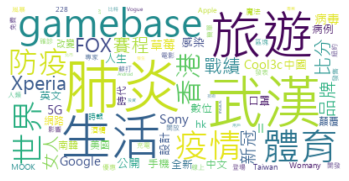

In [180]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color='white',font_path= r'msjh.ttc')
wc.generate_from_frequencies(word_num_dic)

plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()   